Detecting heart diseases using Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mahika (1)/heart_disease_csv.csv")
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df)


In [ ]:
df["target"].value_counts()

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["pink","lightblue"]);

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

Heart Disease Frequency acoording to Sex

In [ ]:
df.sex.value_counts()

In [ ]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

In [ ]:
#create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["pink","lightblue"]);
plt.xlabel("0=No Disease, 1= Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

Age vs Max Heart Rate for Heart Disease

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalassemia[df.target==1],
            c="pink");
plt.scatter(df.age[df.target==0],
            df.thalassemia[df.target==0],
            c="lightblue");
plt.legend(["Disease","No Disease"])

In [ ]:
df.age.plot.hist();

Heart Disease Freq per Chest Pain Type

In [ ]:
pd.crosstab(df.chest_pain_type, df.target)

In [ ]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar", figsize=(10,6),color=["pink","lightblue"]);
plt.xlabel("0=No Disease, 1= Disease");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [ ]:
df.corr()

In [ ]:
corr_matrix=df.corr();
fig, ax= plt.subplots(figsize=(15,10));
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f");

Modelling


In [ ]:
df.head()

In [ ]:
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
X_encoded = df_encoded.drop("target", axis=1)
y_encoded = df_encoded["target"]


In [ ]:
y

In [ ]:
np.random.seed(42)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train_encoded,len(X_train_encoded)

In [ ]:
y_train_encoded,len(y_train_encoded)

In [ ]:
models={"Logestic Regression":LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded):
  """
  Fits and evaluates given ML models.
  models: a dict of different Scikit-Learn ML models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """

  np.random.seed(42)
  model_scores={}
  for name, model in models.items():
    model.fit(X_train_encoded, y_train_encoded)
    model_scores[name]=model.score(X_test_encoded, y_test_encoded)
  return model_scores


In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2)

model_scores = fit_and_score(models=models,
                             X_train_encoded=X_train_encoded,
                             X_test_encoded=X_test_encoded,
                             y_train_encoded=y_train_encoded,
                             y_test_encoded=y_test_encoded)
model_scores


model_compare

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Hyperparameter tuning

In [ ]:
from sklearn import neighbors
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

knn.fit(X_train_encoded,y_train_encoded)

train_scores.append(knn.score(X_train_encoded,y_train_encoded))

test_scores.append(knn.score(X_train_encoded,y_train_encoded))


In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Hyperparameter tuning

In [ ]:
from sklearn import neighbors
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

knn.fit(X_train_encoded,y_train_encoded)

train_scores.append(knn.score(X_train_encoded,y_train_encoded))

test_scores.append(knn.score(X_train_encoded,y_train_encoded))


In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_encoded, y_train_encoded)
    train_scores.append(knn.score(X_train_encoded, y_train_encoded))
    test_scores.append(knn.score(X_test_encoded, y_test_encoded))

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")

Hyperparameters tuning with RandomizedSearchCV

Logestic Regression

In [ ]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [ ]:
np.arange(10,1000,50)

In [ ]:
np.random.seed(42)

rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit
rs_log_reg.fit(X_train_encoded,y_train_encoded)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test_encoded,y_test_encoded)

Random Forest

In [ ]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train_encoded,y_train_encoded)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test_encoded,y_test_encoded)

In [ ]:
model_scores

Hyperparanter Tuning with GridSearchCV

In [ ]:
#LR model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train_encoded,y_train_encoded);

In [ ]:
gs_log_reg.score(X_test_encoded,y_test_encoded)

In [ ]:
model_scores

Evaluating our tuned ML classifier

In [ ]:
y_preds=rs_log_reg.predict(X_test_encoded)

In [ ]:
y_preds

In [ ]:
y_test_encoded

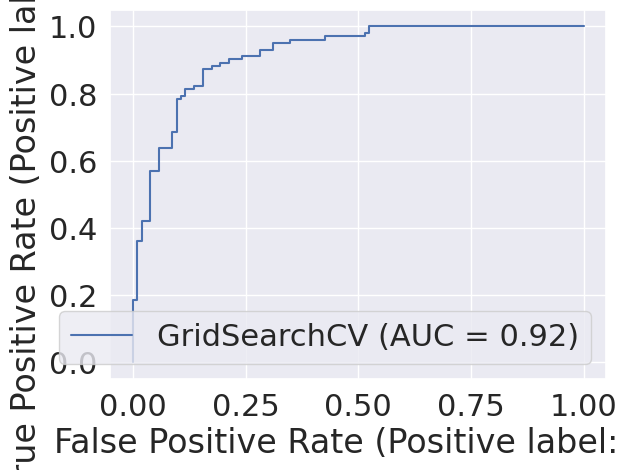

In [ ]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test_encoded, y=y_test_encoded);

In [ ]:
#Confusion matrix
print(confusion_matrix(y_test_encoded,y_preds))

In [ ]:
sns.set(font_scale=2)

def plot_conf_mat(y_test_encoded,y_preds):
  """
  Plots a nice looking confusion matrix using Seaborn's heatmap()
  """
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test_encoded,y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

  plot_conf_mat(y_test_encoded,y_preds)

In [ ]:
print(classification_report(y_test_encoded,y_preds))

crooss-evaluation

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf=LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")

In [ ]:
cv_acc=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="accuracy")
cv_acc

In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

In [ ]:
cv_precision=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
cv_recall=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

In [ ]:
cv_f1=cross_val_score(clf,
                       X_encoded,
                       y_encoded,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

In [ ]:
#Visualize
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

Feature Importance

In [ ]:
df.head()

In [ ]:
#fit
clf=LogisticRegression(C=11.288378916846883,
                       solver="liblinear")
clf.fit(X_train_encoded,y_train_encoded)


In [ ]:
#check coef
clf.coef_

In [ ]:
#match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

In [ ]:
#visualise feat imp
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)